## CMPINF 2100 Week 11 | Introduction to fitting LOGISTIC REGRESSION with Statsmodels

Logistic regression is a model type for BINARY CLASSIFICATION

However, logistic regression is a Generalized Linear Model (GLM). Therefore, almost everything from Linear Models (LM) applies!

We can use everything about creating features, additive features, non-linear features derrived inputs.

There are several key differences which we will learn about next week.

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf

### Read Data

In [2]:
df = pd.read_csv('week_11_intro_binary_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       115 non-null    float64
 1   y       115 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [4]:
df.nunique()

x    115
y      2
dtype: int64

In [5]:
df.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


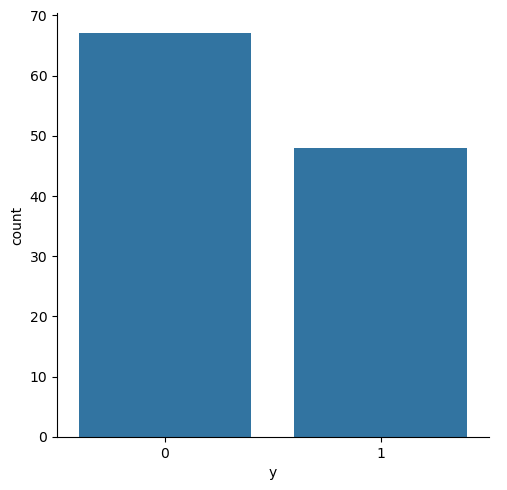

In [6]:
sns.catplot( data=df, x='y', kind='count')

plt.show()

In [7]:
df.describe()

,x,y
count,115.000000,115.000000
mean,0.019188,0.417391
std,1.001227,0.495287
min,-2.059272,0.000000
25%,-0.721905,0.000000
50%,0.114752,0.000000
75%,0.570510,1.000000
max,2.438859,1.000000


In [10]:
df.y.mean()

0.41739130434782606

In [11]:
df.y.value_counts()

y
0    67
1    48
Name: count, dtype: int64

In [12]:
df.y.value_counts(normalize=True)

y
0    0.582609
1    0.417391
Name: proportion, dtype: float64

The input is CONTINUOUS.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


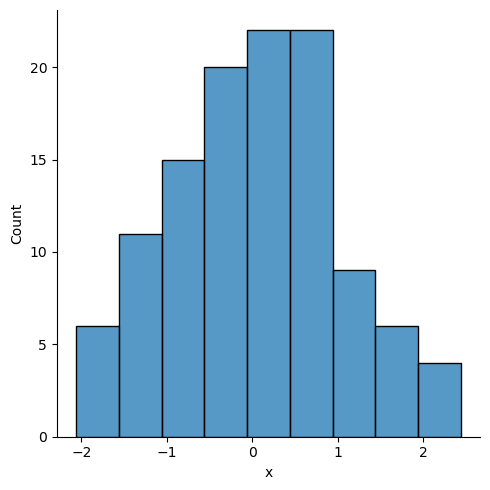

In [13]:
sns.displot(data=df, x='x', kind='hist')

plt.show()

Hoe does the continous input RELATE to the categorical output?!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


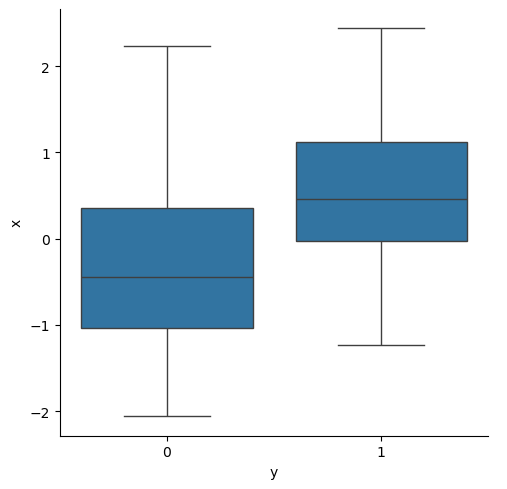

In [14]:
sns.catplot(data=df, x='y', y='x', kind='box')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


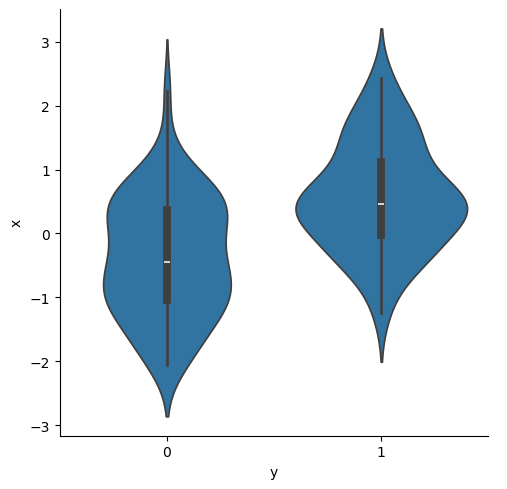

In [15]:
sns.catplot( data=df, x='y', y='x', kind='violin')

plt.show()

What is the AVERAGE continuous INPUT **GIVEN** the Binary output?!

C:\Users\Canye\AppData\Local\Temp\ipykernel_27948\1384658217.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=df, x='y', y='x', kind='point', join=False)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


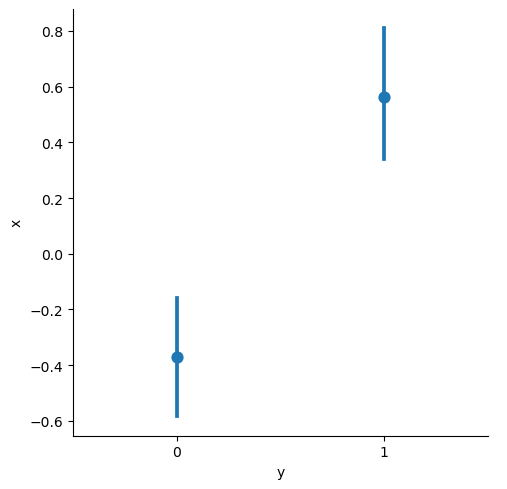

In [16]:
sns.catplot(data=df, x='y', y='x', kind='point', join=False)

plt.show()

On average there seems to be a DIFFERENCE in the INPUT when the EVENT is observed!

The visual exploration suggest that the INPUT is RELATED to the BINARY OUTPUT!

### Fit logistic regression

The syntax for fitting a logistic regression model for BINARY CLASSIFICATION is very simular to that for the linear model for regression!

HOWEVER, we must TELL statsmodels this ios a logistic regression problem and NOT regression!

In [18]:
fit_glm = smf.logit(formula='y ~ x', data=df).fit()

Optimization terminated successfully.
         Current function value: 0.560099
         Iterations 6


Let's see what happens if we would MISTAKENLY fit the LINEAR MODEL for regression!

In [19]:
fit_ols = smf.ols(formula='y ~ x', data=df).fit()

But because logistic is a Generalized Linear Model, many of the interpretation concepts still apply!

In [20]:
fit_glm.params

Intercept   -0.449518
x            1.183814
dtype: float64

In [21]:
fit_glm.bse

Intercept    0.218009
x            0.267133
dtype: float64

In [22]:
fit_glm.pvalues

Intercept    0.039215
x            0.000009
dtype: float64

In [24]:
fit_glm.conf_int().\
rename(columns={0: 'conf_lwr', 1: 'conf_upr'})

,conf_lwr,conf_upr
Intercept,-0.876808,-0.022228
x,0.660243,1.707385


In [25]:
fit_glm.pvalues < 0.05

Intercept    True
x            True
dtype: bool

In [26]:
def my_coefplot( mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)

    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)

    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')

    ax.set_xlabel('coefficient value')

    plt.show()

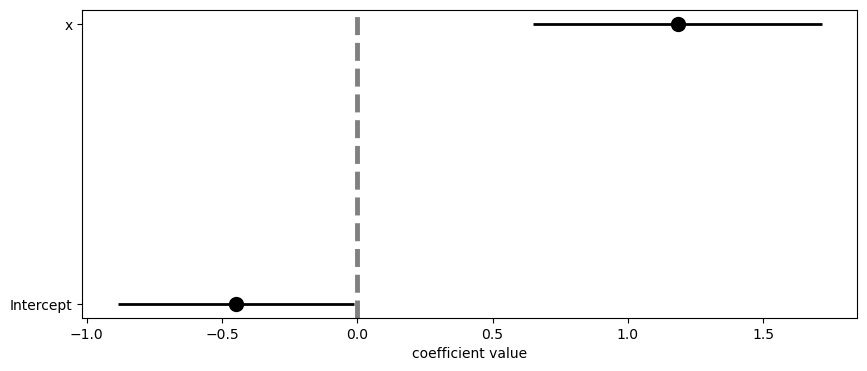

In [27]:
my_coefplot( fit_glm )

The DIFFERENCE between the interpretation of the logistic regression SLOPE vs the "regular" linear model SLOPE is that... the logiostic regression slope is NOT how much the AVERAGE OUTPUT changes due to a one unit change of the INPUT!

The slope is how much the LOG-ODDS RATIO CHANGES as the input changes 1 unit!

### Predictions

Fundamentally we are predicting the EVENT PROBABILITY!

The `.predict()` therefore returns the predicted probability!

Define a VISUALIZATION GRID between a VERY NEGATIVE INPUT and a VERY POSITIVE INPUT.

In [28]:
df.describe()

,x,y
count,115.000000,115.000000
mean,0.019188,0.417391
std,1.001227,0.495287
min,-2.059272,0.000000
25%,-0.721905,0.000000
50%,0.114752,0.000000
75%,0.570510,1.000000
max,2.438859,1.000000


Let's use a lower bound of -5 and an upper bound of 5 for the input in the visualization grid.

In [29]:
input_grid = pd.DataFrame({'x': np.linspace(-5, 5, num=251)})

In [30]:
input_grid

,x
0,-5.00
1,-4.96
2,-4.92
3,-4.88
4,-4.84
...,...
246,4.84
247,4.88
248,4.92
249,4.96


Define a copy of the input grid.

In [31]:
df_viz = input_grid.copy()

Include a new column for the PREDICTED PROBABILITY from the logistic regression model!

In [32]:
df_viz['pred_probability'] = fit_glm.predict( input_grid )

In [33]:
df_viz

,x,pred_probability
0,-5.00,0.001712
1,-4.96,0.001794
2,-4.92,0.001881
3,-4.88,0.001972
4,-4.84,0.002068
...,...,...
246,4.84,0.994934
247,4.88,0.995167
248,4.92,0.995390
249,4.96,0.995602


In [35]:
df_viz.describe()

,x,pred_probability
count,251.000000,251.000000
mean,0.000000,0.462384
std,2.904066,0.406932
min,-5.000000,0.001712
25%,-2.500000,0.032022
50%,0.000000,0.389475
75%,2.500000,0.924824
max,5.000000,0.995805


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


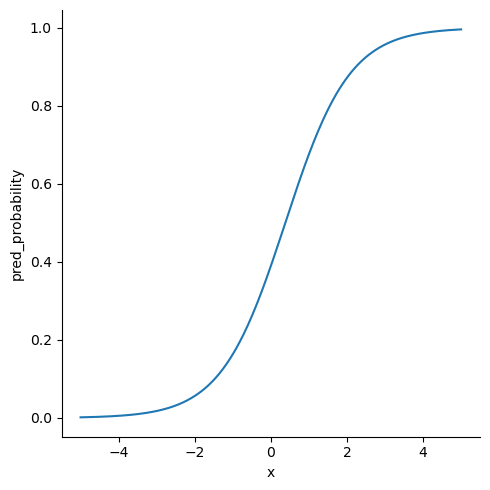

In [36]:
sns.relplot(data=df_viz, x='x', y='pred_probability', kind='line')

plt.show()

Why does this matter?

What happens if we MISTAKENLY fit the Regular linear model!?

In [37]:
fit_ols.params

Intercept    0.412996
x            0.229045
dtype: float64

In [38]:
fit_ols.bse

Intercept    0.041125
x            0.041247
dtype: float64

In [39]:
fit_ols.pvalues

Intercept    2.405283e-17
x            1.884900e-07
dtype: float64

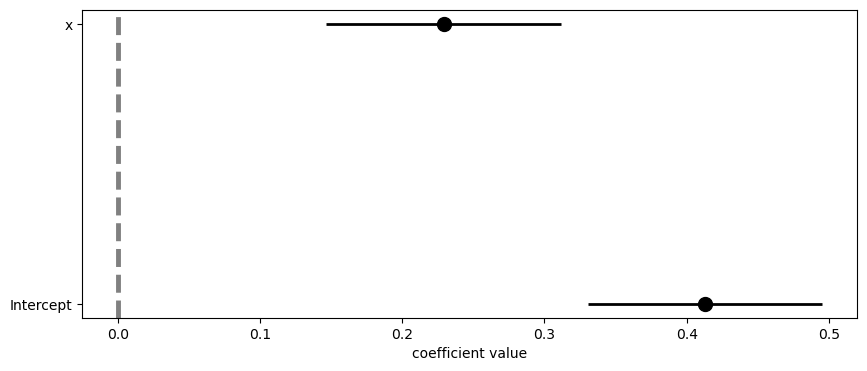

In [40]:
my_coefplot ( fit_ols )

Predict with the incorrect linear model.

In [41]:
df_viz['pred_from_ols'] = fit_ols.predict( input_grid )

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


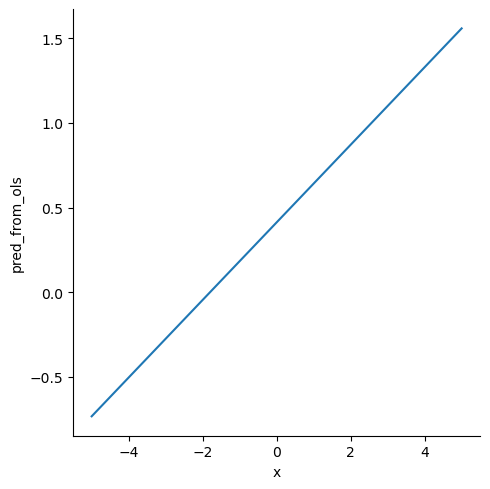

In [42]:
sns.relplot( data=df_viz, x='x', y='pred_from_ols', kind='line')

plt.show()

### Visually explore the logistic trends

The `sns.lmplot()` function allows you to visualize the logistic regression fit!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


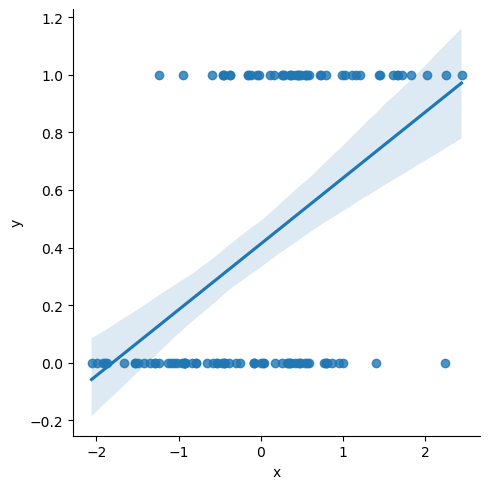

In [43]:
sns.lmplot( data=df, x='x', y='y') 

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


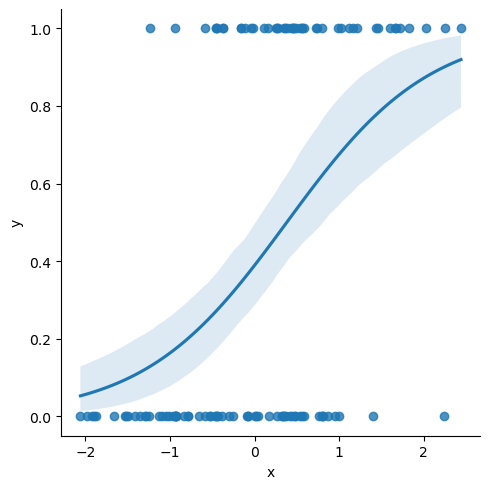

In [44]:
sns.lmplot( data=df, x='x', y='y', logistic=True) 

plt.show()